In [2]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from scipy.stats import sem, t, ttest_ind, pearsonr
import itertools
import pandas as pd
from scipy.io import loadmat

In [3]:
RNN_params = {
    'prob_split': '70_30',
    'afc': [6, 2],
    'coh': ['hi', 'lo'],
    'feedback': False,
    'thresh': [.3, .7],
    'model': [0, 1 ,2],
    'fr': [1,3]
}

In [4]:
# now check out unexpected
# load 
fr = 3
modelnum = 0
afc = 6
coh = 'hi'


# load and graph
#full_file = f'/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
full_file = f'/Volumes/serenceslab/holly/RNN_Geo/data/decoding/unexpected/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
acc = np.load(full_file)
for var in acc:
        globals()[var] = acc[var]    

In [65]:
# load 
fr = 1
modelnum = 0


combinations = list(itertools.product(RNN_params['afc'], RNN_params['coh']))

for afc, coh in combinations:

    # load and graph
    #full_file = f'/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
    full_file = f'/Volumes/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
    acc = np.load(full_file)
    
    for var in acc:
        globals()[var] = acc[var]
        
afc6 = np.stack((hi_6afc, lo_6afc), axis = 3) 
afc2 = np.stack((hi_2afc, lo_2afc), axis = 3)

In [43]:
hi_6afc.shape
cond.shape

(1000, 71, 6)

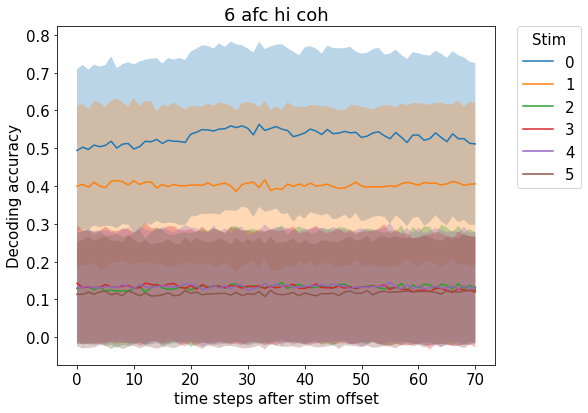

In [84]:
cond = acc
coh = 'hi'
afc = 6
confidence = .95
dof = cond.shape[0] - 1
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
data = np.mean(cond, axis = 0)
x_data = np.arange(data.shape[0])


plt.figure(figsize = (10,6))
for i in range(afc):
    s = cond[:,:,i].std(axis=0)
    plt.plot(data[:, i], label=f'{i}')
    plt.fill_between(x_data, data[:,i] -s, data[:,i] +s, alpha = 0.3)
    
    
    
significant_regions = np.zeros(cond.shape[1], dtype=bool)
alpha = 0.05
for t_step in range(cond.shape[1]):
    stim_0 = cond[:, t_step, 0]
    for i in range(1, afc):
        stim_i = cond[:, t_step, i]
        t_stat, p_value = ttest_ind(stim_0, stim_i)
        if p_value < alpha:
            significant_regions[t_step] = True
            break  # Once we find significance with any stim, we can stop checking

# Shade the regions where Stim 0 significantly differs from others
#plt.fill_between(x_data, plt.ylim()[0], plt.ylim()[1], where=significant_regions, color='red', alpha=0.1)

plt.rcParams.update({'font.size': 15})
plt.xlabel('time steps after stim offset')
plt.ylabel('Decoding accuracy')
plt.title(f'{afc} afc {coh} coh')
plt.legend(title = 'Stim', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [95]:
acc.shape

(1000, 71, 6)

In [55]:
# Calculate the correlation coefficient for Stim 1
stim_1_mean = np.mean(cond[:, :, 5], axis=0)
r_value, p_value = pearsonr(x_data, stim_1_mean)
r_value

0.8170481289583644

In [74]:
# generate a table with pearsons r
cond = hi_6afc
afc = 6
x_data = np.arange(cond.shape[1])

# Create a list to hold the results
results = []

# Calculate Pearson r and p-value for each stimulus label
for i in range(afc):
    stim_mean = np.mean(cond[:, :, i], axis=0)
    r_value, p_value = pearsonr(x_data, stim_mean)
    results.append([f'Stim {i}', r_value, p_value])

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Stimulus', 'Pearson r', 'p-value'])

# Display the table
print(results_df)

  Stimulus  Pearson r       p-value
0   Stim 0  -0.983964  2.131347e-53
1   Stim 1  -0.942377  1.563138e-34
2   Stim 2  -0.954773  4.514357e-38
3   Stim 3  -0.949278  2.152222e-36
4   Stim 4  -0.984647  4.800246e-54
5   Stim 5  -0.971289  9.219072e-45


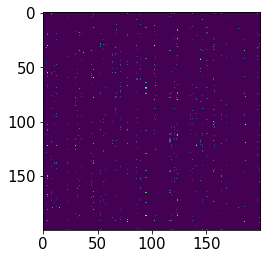

In [162]:
modelnum = 2

mat_files = [f for f in os.listdir(data_dir) if f.endswith('.mat')]# Get all the trained models (should be 40 .mat files)
model_path = os.path.join(data_dir, mat_files[modelnum]) 
model = loadmat(model_path) # model.keys()
model.keys()
plt.imshow(model['w3'], cmap='viridis', interpolation='nearest')


In [101]:
# check models comparison
fr = 1
afc = 6
coh = 'hi'
models = [0, 1, 2]

model_data = {}
for modelnum in models:

    # load and graph
    #full_file = f'/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
    full_file = f'/Volumes/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
    acc = np.load(full_file)
    
    model_data[modelnum] = {var: acc[var] for var in acc}

     
mods = np.stack((model_data[0]['hi_6afc'], model_data[1]['acc'],model_data[2]['acc']), axis = 3)

In [121]:
mods.shape

(1000, 71, 6, 3)

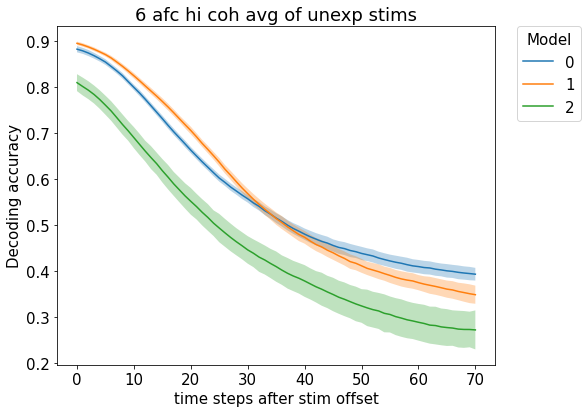

In [132]:
plt.figure(figsize = (10,6))


confidence = .95
dof = cond.shape[0] - 1
t_crit = np.abs(t.ppf((1-confidence)/2,dof))


for m in range(mods.shape[3]):
    data = np.mean(np.mean(mods[:,:,:5,m], axis = 2), axis = 0)
    x_data = np.arange(data.shape[0])
    s = mods[:,:,0,m].std(axis=0)
    plt.plot(data, label=f'{m}')
    plt.fill_between(x_data, data -s, data +s, alpha = 0.3)

plt.rcParams.update({'font.size': 15})
plt.xlabel('time steps after stim offset')
plt.ylabel('Decoding accuracy')
plt.title(f'{afc} afc {coh} coh avg of unexp stims')
plt.legend(title = 'Model', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [124]:
data.shape

(71,)

In [9]:
# testing starmap

# import these are all needed for fnc
import numpy as np
import sys
import os
from fnc_fit_and_score import fnc_fit_and_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from scipy.optimize import curve_fit
from multiprocessing import Pool

import time

# what are we decoding
RNN_params = {}
RNN_params['prob_split'] = '70_30'
RNN_params['afc'] = 2
RNN_params['coh'] = 'hi'
RNN_params['feedback'] = False
RNN_params['thresh'] = [.3,.7]

# Decoding params
D_params = {}
D_params['time_avg'] = False
D_params['t_win'] = [200,-1]
D_params['n_cvs'] = 5
D_params['num_cgs'] = 30
D_params['label'] = 'stim' # 'stim' or 'choice'

# Load data
if sys.platform.startswith('linux'):
    data_dir = f"/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/rdk_{RNN_params['prob_split']}_{RNN_params['afc']}afc/feedforward_only/{RNN_params['coh']}_coh"
else:
    data_dir = f"/Volumes/serenceslab/holly/RNN_Geo/data/rdk_{RNN_params['prob_split']}_{RNN_params['afc']}afc/feedforward_only/{RNN_params['coh']}_coh"

# Change this if we want a different number of trials and different default stim (0 is the one RNN was trained on)
data_file = f"{data_dir}/Trials200_0expected.npz"

# Timing of task
task_info = {}
task_info['trials'] = 200
task_info['trial_dur'] = 250  # trial duration (timesteps)
task_info['stim_on'] = 80
task_info['stim_dur'] = 50

save_plt = False
prob_split = RNN_params.get('prb_split', '70_30')
afc = RNN_params.get('afc', 2)
coh = RNN_params.get('coh', 'hi')
feedback = RNN_params.get('feedback', False)
thresh = RNN_params.get('thresh', [.3, .7])
time_avg = D_params.get('time_avg', False)
t_win = D_params.get('t_win', [200, -1])
label = D_params.get('label', 'stim')
n_cvs = D_params.get('n_cvs', 5)
num_cgs = D_params.get('num_cgs', 30)
# penalties to eval
Cs = np.logspace( -5,1, num_cgs )

# store the accuracy
acc = np.full( ( n_cvs ), np.nan )

# set up the grid
param_grid = { 'C': Cs, 'kernel': ['linear'] }

# define object - use a SVC that balances class weights (because they are biased, e.g. 70/30)
# note that can also specify cv folds here, but I'm doing it by hand below in a loop
grid = GridSearchCV( SVC(class_weight = 'balanced'),param_grid,refit=True,verbose=0 )

# load data
data = np.load(data_file)

# set-up vars for decoding   
data_d = data['fr1']# layer 1 firing rate [trial x time step x unit] matrix
labs = data['labs'].squeeze()

# get some info about structure of the data
tris = data_d.shape[0]             # number of trials
tri_ind = np.arange(0,tris)      # list from 0...tris
hold_out = int( tris / n_cvs )   # how many trials to hold out
# pre-allocate
decoding_acc = np.nan


#start_time = time.time()
if __name__ == "__main__":
    pool = Pool(processes=round(os.cpu_count() * .7))
    with pool:  # use 70% of cpus
        results = pool.starmap(fnc_fit_and_score, [
            (t_step, data_d[:, t_step, :], tri_ind, hold_out, n_cvs, labs, label, thresh, grid)
            for t_step in range(task_info['trial_dur'])
        ], chunksize = 10)

    # Process the results from each worker process (list of lists of accuracies)
    decoding_acc = np.mean(np.array(results), axis=1)  # Calculate mean accuracy for each time step

#end_time = time.time()
print(f'done decoding')

done decoding
